# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split data to training & test 
from sklearn.model_selection import train_test_split

# perfomance metrics
from sklearn import metrics

# preprocessing libs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# classifier algo
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC


# IMPORT DATA

In [2]:
#import dataset
data = pd.read_csv("../processed_data/spambase.csv")
data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
print(data.columns)
print (f"{'Number of columms':<20}{len(data.columns):<30}")
print (f"{'Number of records':<20}{len(data):<30}")

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


# EDA

        count      mean       std  min  25%  50%   75%   max
class                                                       
0      2788.0  0.073479  0.297838  0.0  0.0  0.0  0.00  4.34
1      1813.0  0.152339  0.310645  0.0  0.0  0.0  0.17  4.54


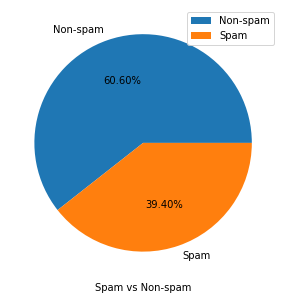

In [4]:
grouped_data = data.groupby(data['class'])
print(grouped_data[data.columns[0]].describe(include='all'))
data_df = data['class'].value_counts()
data_df.plot(kind='pie', figsize = (5, 5), autopct = '%1.2f%%', labels=['Non-spam','Spam'])
plt.xlabel("Spam vs Non-spam")
plt.ylabel(None)
plt.legend(["Non-spam", "Spam"])
plt.show()

In [5]:
# observe the records whose `word_freq_make` has value of zero
data[data[data.columns[0]] == 0]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61,278,1
3,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40,191,1
4,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40,191,1
5,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15,54,1
6,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.052,0.000,0.0,1.000,1,6,0
4594,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.630,0.0,0.000,0.000,0.0,1.727,5,19,0
4595,0.0,0.00,1.19,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.000,1,24,0
4597,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.353,0.000,0.0,1.555,4,14,0


In [6]:
# statistic
print (f"{'col_idx':<9}{'column_name':<30}{'no of records having 0':<30}{'other columns': <10}")
for i in range(len(data.columns) - 1):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (f"{i:<9}{data.columns[i]:<30}{c:<30}{len(data)-c: <10}")

col_idx  column_name                   no of records having 0        other columns
0        word_freq_make                3548                          1053      
1        word_freq_address             3703                          898       
2        word_freq_all                 2713                          1888      
3        word_freq_3d                  4554                          47        
4        word_freq_our                 2853                          1748      
5        word_freq_over                3602                          999       
6        word_freq_remove              3794                          807       
7        word_freq_internet            3777                          824       
8        word_freq_order               3828                          773       
9        word_freq_mail                3299                          1302      
10       word_freq_receive             3892                          709       
11       word_freq_will              

Number of columms   58                            


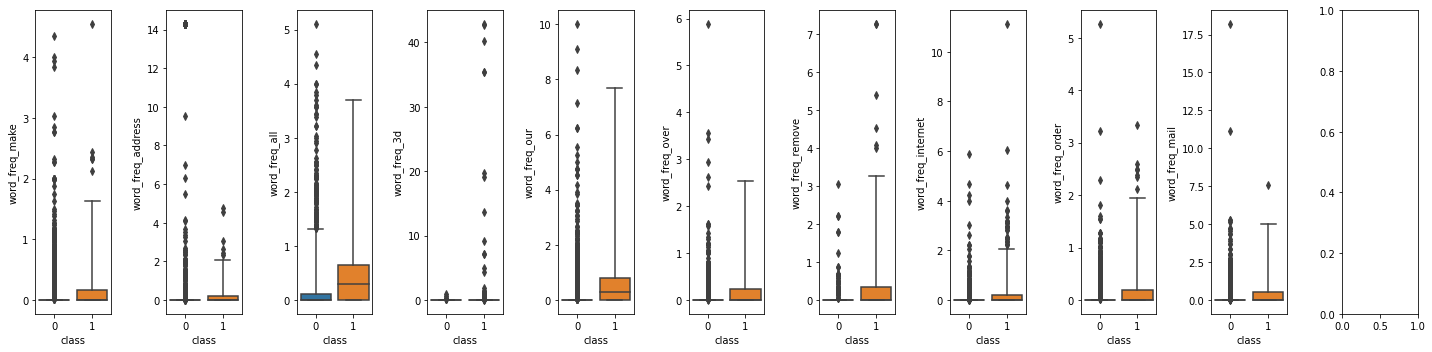

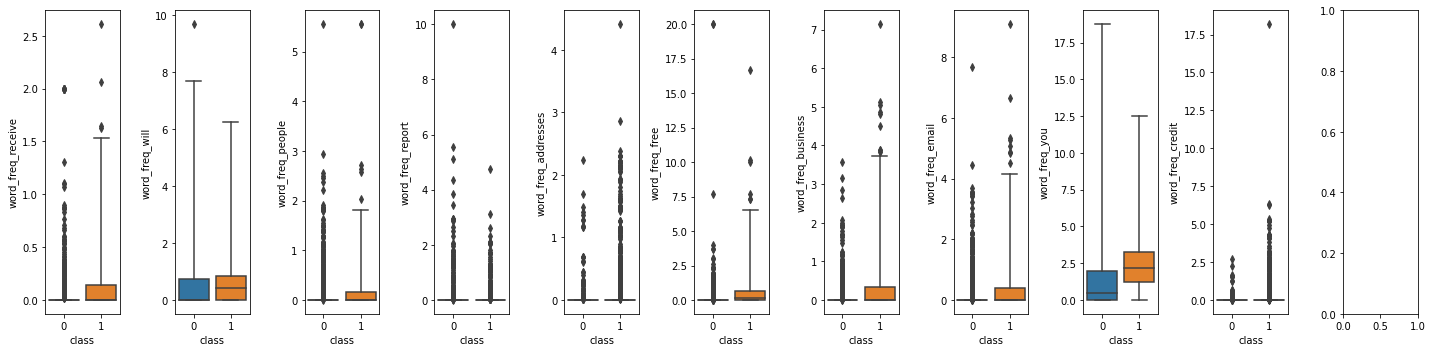

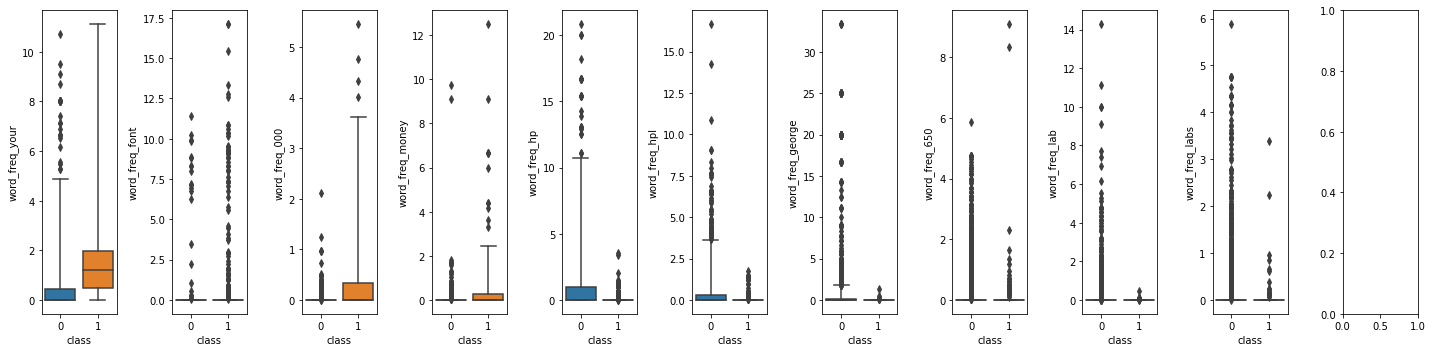

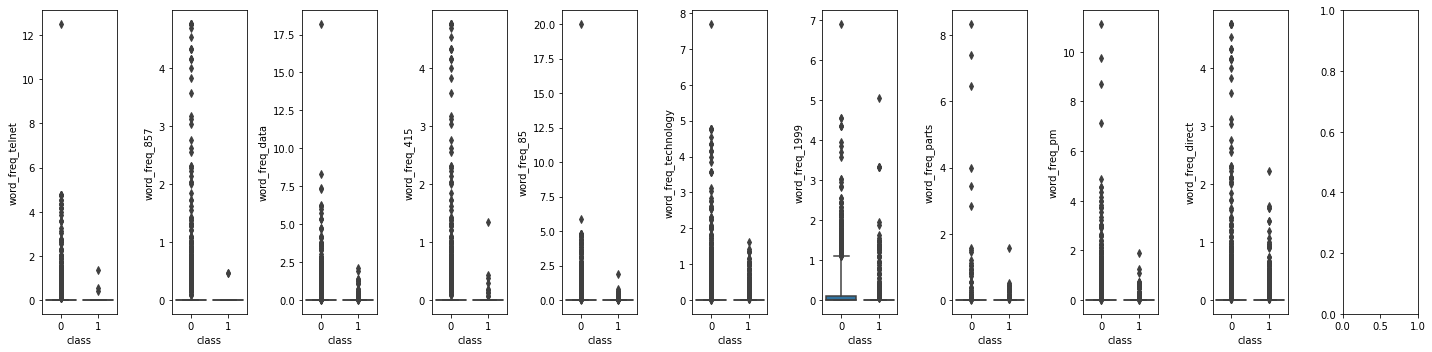

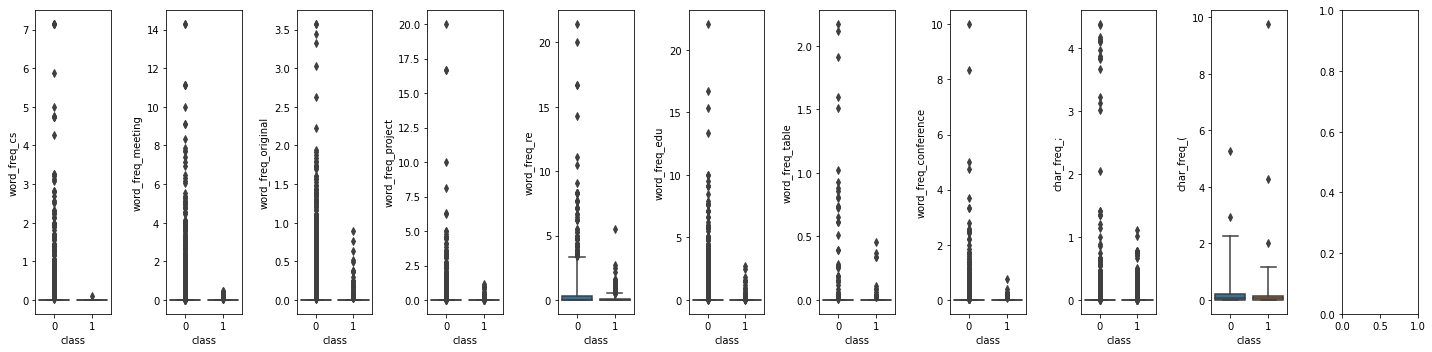

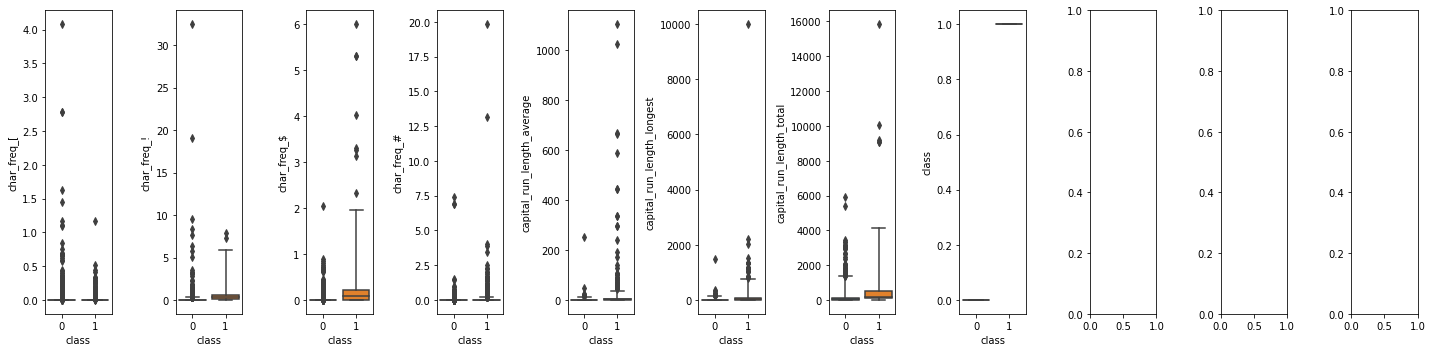

In [7]:
import math
columns = len(data.columns)
print (f"{'Number of columms':<20}{len(data.columns):<30}")
for i in range(math.ceil(columns/10)):
    fig, axes = plt.subplots(1, 11, figsize = (20, 5))
    for j in range(10):
        if i * 10 + j < columns:
            sns.boxplot(x='class', y = data.columns[i * 10 + j], data = data, orient = 'v', ax = axes[j], whis=10)
    plt.tight_layout()
    plt.cla()

# Data Modelling
## Performance Evaluation Technique
- In this project, Decision Tree, KNN, Naive Bayes & SVM are picked as classifiers.
- Each model is fitted with the training set, validated using the validation set. The results are assessed by popular performance measures: accuracy, precision, recall and F1 score.
    + **Accuracy:**: the percentage of both spam & non-spam emails model correctly classified
    + **Precision**: 
        + Class 0 (non-spam): the percentage of non-spam email that model classified correctly in relation to the total number of emails that model had classified as non-spam email.
        + Class 1 (spam): the percentage of spam email that model classified correctly in relation to the total number of emails that model had classified as spam email.
    + **Recall**: 
        + Class 0 (non-spam): the percentage of non-spam that email model classified correctly in relation to the total number of real non-spam emails.
        + Class 1 (spam): the percentage of spam email that model classified correctly in relation to the total number of real spam emails.
    + **F1 score**: harmonic mean between **Precision** and **Recall**. **F1 score** is high only **Precision** and **Recall** are both high.
- Finally, each model is tested with test set, then the results are compared for each model using the above performance measures.

### Performance Evaluation Helpers

In [8]:
# Ref: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

def getPerfClassificationReport(y_true, y_pred):
    return metrics.classification_report(y_true,y_pred, output_dict=True)

def getPerfMeasures(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average = None)
    recall = metrics.recall_score(y_true, y_pred, average = None)
    f1_score = metrics.f1_score(y_true, y_pred, average = None)
    return accuracy, precision, recall, f1_score

def viewConfMatrixAndPerfMeasures(y_true, y_pred):
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    
    # use heatmap to get result
    sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.tight_layout()
    
    # get performance measures
    accuracy, precision, recall, f1_score = getPerfMeasures(y_true, y_pred)
    print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", f1_score)
    print("Raw Confusion Matrix: \n", conf_matrix)
#     print (f"{i:<9}{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")
    

## Data Splitting

- Split spambase dataset into 2 parts: train & test set
    + test set is 25% of data: 25% * 4601 = 1151
    + train set is 75% left of data: 75% * 4601 = 3450
- Then continue to split training set into 2 parts: train & validate
    + validate set is 25% of original train set: 25% * 3450 = 863
    + train set is 75% left of data: 75% * 3450 = 2587
- Overall
    + 1151 test records
    + 863 validate records
    + 2587 train records

In [9]:
#Splitting dataset for classification

#creating test and train sets
x_original = data.iloc[:,:-1]
y_original = data['class']
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=0.25, random_state=0)
print("Test Data: ", len(x_test))

#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)
print("Validating Data: ", len(x_val))
print("Train Data: ", len(x_train))

Test Data:  1151
Validating Data:  863
Train Data:  2587


- Because data in columns are measured in different scaled 
-> need to standardize the data before fitting into the models

In [10]:
# standardizing datasets for classification
scaler = StandardScaler()
# fit the data
scaler.fit(x_train)
# transform the data
x_train_scaled = pd.DataFrame(scaler.transform(x_train))
x_val_scaled = pd.DataFrame(scaler.transform(x_val))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

## Classification

### Classification: Decision Tree

In [11]:
# Decision Tree helpers
def dtTrainHlp(x_hlp_data, y_hlp_data, criterion_hlp, max_depth_hlp):
    dtClfHlp = DecisionTreeClassifier(criterion=criterion_hlp, max_depth=max_depth_hlp, random_state=1)
    dtClfHlp.fit(x_hlp_data, y_hlp_data)
    return dtClfHlp

def dtMultipleTrain(x_hlp_data, y_hlp_data, criterion_hlp, try_depth_hlp):
    tree_acc = []
    tree_prec = []
    tree_rec = []
    tree_f1 = []
    for d in try_depth_hlp:
        decisionTreeClf = dtTrainHlp(x_hlp_data, y_hlp_data, criterion_hlp, d)
        y_val_pred = decisionTreeClf.predict(x_val_scaled)
        accuracy, precision, recall, f1_score = getPerfMeasures(y_val, y_val_pred)
        tree_acc.append(accuracy)
        tree_prec.append(precision)
        tree_rec.append(recall)
        tree_f1.append(f1_score)
    return tree_acc, tree_prec, tree_rec, tree_f1

def dtMultipleTrainBeautifulRs(x_hlp_data, y_hlp_data, criterion_hlp, try_depth_hlp):
    tree_acc, tree_prec, tree_rec, tree_f1 = dtMultipleTrain(x_hlp_data, y_hlp_data, criterion_hlp, try_depth_hlp)
    tree_rs = {"Max Depth":try_depth,'Accuracy':tree_acc, 'Precision':tree_prec, 'Recall':tree_rec, 'F1 Score':tree_f1}
    tree_rs = pd.DataFrame(tree_rs)
    return tree_rs
    

In [12]:
# train with Decision Tree using criterion: entropy

try_depth = list(range(1,20))
# add none depth to try list
try_depth.append(None)

tree_entropy_rs = dtMultipleTrainBeautifulRs(x_train_scaled, y_train, "entropy", try_depth)
entropy_optimal_acc_depth = tree_entropy_rs['Accuracy'].idxmax() + 1
print (f"{'Optimal accuracy depth: ':<15}{entropy_optimal_acc_depth:<20}")
print (f"{'Accuracy ':<15}{max(tree_entropy_rs['Accuracy']):<20}")
tree_entropy_rs.head(entropy_optimal_acc_depth + 1).style

Optimal accuracy depth: 9                   
Accuracy       0.9258400926998841  


,Max Depth,Accuracy,Precision,Recall,F1 Score
0,1.000000,0.791425,[0.75820896 0.90673575],[0.96577947 0.51928783],[0.84949833 0.66037736]
1,2.000000,0.872538,[0.83876221 0.95582329],[0.97908745 0.70623145],[0.90350877 0.81228669]
2,3.000000,0.886443,[0.92125984 0.83661972],[0.88973384 0.88130564],[0.90522244 0.8583815 ]
3,4.000000,0.913094,[0.90777577 0.92258065],[0.95437262 0.84866469],[0.9304912 0.88408037]
4,5.000000,0.918888,[0.91155235 0.93203883],[0.96007605 0.85459941],[0.93518519 0.89164087]
5,6.000000,0.909618,[0.9 0.92739274],[0.9581749 0.83382789],[0.9281768 0.878125 ]
6,7.000000,0.915411,[0.8994709 0.94594595],[0.96958175 0.83086053],[0.93321134 0.88467615]
7,8.000000,0.899189,[0.92292871 0.86337209],[0.91064639 0.88130564],[0.91674641 0.8722467 ]
8,9.000000,0.925840,[0.92936803 0.92 ],[0.95057034 0.88724036],[0.93984962 0.90332326]
9,10.000000,0.904983,[0.93529412 0.8611898 ],[0.90684411 0.90207715],[0.92084942 0.88115942]


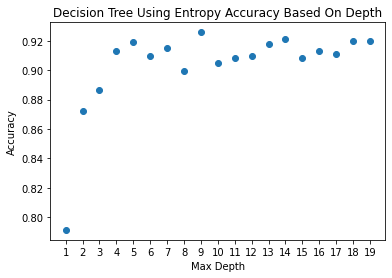

In [13]:
plt.plot(try_depth, tree_entropy_rs['Accuracy'], 'o')
plt.title('Decision Tree Using Entropy Accuracy Based On Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
# remove the none value in the try depth: avoid exception
plt.xticks(try_depth[:-1])
plt.show()

In [14]:
# train with Decision Tree using criterion: gini

try_depth = list(range(1,20))
# add none depth to try list
try_depth.append(None)

tree_gini_rs = dtMultipleTrainBeautifulRs(x_train_scaled, y_train, "gini", try_depth)
gini_optimal_acc_depth = tree_gini_rs['Accuracy'].idxmax() + 1
print (f"{'Optimal depth: ':<15}{gini_optimal_acc_depth:<20}")
print (f"{'Accuracy ':<15}{max(tree_gini_rs['Accuracy']):<20}")
tree_gini_rs.head(gini_optimal_acc_depth + 1).style

Optimal depth: 16                  
Accuracy       0.9281575898030128  


,Max Depth,Accuracy,Precision,Recall,F1 Score
0,1.000000,0.791425,[0.75820896 0.90673575],[0.96577947 0.51928783],[0.84949833 0.66037736]
1,2.000000,0.872538,[0.83876221 0.95582329],[0.97908745 0.70623145],[0.90350877 0.81228669]
2,3.000000,0.886443,[0.92125984 0.83661972],[0.88973384 0.88130564],[0.90522244 0.8583815 ]
3,4.000000,0.914253,[0.90794224 0.92556634],[0.95627376 0.84866469],[0.93148148 0.88544892]
4,5.000000,0.917729,[0.90843806 0.93464052],[0.96197719 0.84866469],[0.93444137 0.88958009]
5,6.000000,0.926999,[0.92321755 0.9335443 ],[0.96007605 0.87537092],[0.94128611 0.90352221]
6,7.000000,0.923523,[0.92910448 0.91437309],[0.94676806 0.88724036],[0.93785311 0.90060241]
7,8.000000,0.921205,[0.92407407 0.91640867],[0.9486692 0.87833828],[0.93621013 0.8969697 ]
8,9.000000,0.926999,[0.92791128 0.92546584],[0.95437262 0.884273 ],[0.94095595 0.90440061]
9,10.000000,0.921205,[0.93045113 0.90634441],[0.94106464 0.89020772],[0.93572779 0.89820359]


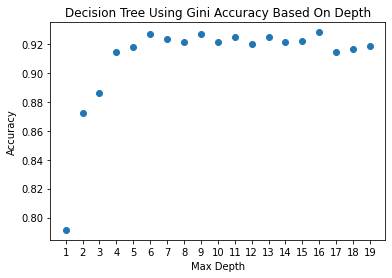

In [15]:
plt.plot(try_depth, tree_gini_rs['Accuracy'], 'o')
plt.title('Decision Tree Using Gini Accuracy Based On Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
# remove the none value in the try depth: avoid exception
plt.xticks(try_depth[:-1])
plt.show()

9
Accuracy =  0.9258400926998841 
Precision = [0.92936803 0.92      ] 
Recall =  [0.95057034 0.88724036] 
F1 Score =  [0.93984962 0.90332326]
Raw Confusion Matrix: 
 [[500  26]
 [ 38 299]]


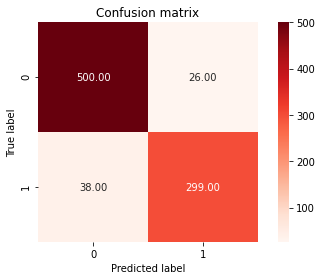

In [16]:
# try again with the best result of using entropy with optimal max depth
print(entropy_optimal_acc_depth)
entropyDecisionTreeClf = dtTrainHlp(x_train_scaled, y_train, "entropy", entropy_optimal_acc_depth)

# estimate the skill of model -> lest try with validation dataset
y_val_pred = entropyDecisionTreeClf.predict(x_val_scaled)
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

16
Accuracy =  0.9281575898030128 
Precision = [0.93445693 0.91793313] 
Recall =  [0.9486692  0.89614243] 
F1 Score =  [0.94150943 0.90690691]
Raw Confusion Matrix: 
 [[499  27]
 [ 35 302]]


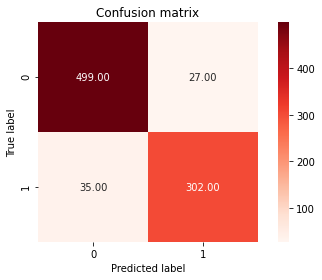

In [17]:
# try again with the best result of using gini with optimal max depth
print(gini_optimal_acc_depth)
giniDecisionTreeClf = dtTrainHlp(x_train_scaled, y_train, "gini", gini_optimal_acc_depth)

# estimate the skill of model -> lest try with validation dataset
y_val_pred = giniDecisionTreeClf.predict(x_val_scaled)
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

### Classification: K Nearest Neighbors

- First, try to fit the KNN model with 3 neighbors

In [18]:
# train with KNN
# Using K = 3
knnClf = KNeighborsClassifier(n_neighbors = 3, weights='distance')  
knnClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = knnClf.predict(x_val_scaled)

Accuracy =  0.9200463499420626 
Precision = [0.92393321 0.91358025] 
Recall =  [0.94676806 0.87833828] 
F1 Score =  [0.93521127 0.89561271]
Raw Confusion Matrix: 
 [[498  28]
 [ 41 296]]


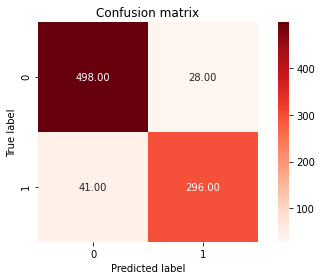

In [19]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

- Now, try to find the optimal number of neighbors that KNN model should use. To do this, model will need to be fitted with different value of K. The results of each K will be compared with each other.
- In this project, number of neighbors starts with 1 and ends with 19

In [20]:
# Finding the best K value: optimal number of neighbors
k_optimal_acc = 0
k_optimal_acc_k = 1
try_k = range(1, 20)
k_acc = []
k_prec = []
k_rec = []
k_f1 = []
# print (f"{'K value':<10}{'Acurracy':<20}{'Precision':<20}{'Recall': <20}{'F1 Score': <20}")
for k in try_k:
    knnClf = KNeighborsClassifier(n_neighbors = k, weights='distance')  
    knnClf.fit(x_train_scaled,y_train)
    y_val_pred = knnClf.predict(x_val_scaled)
    
    accuracy, precision, recall, f1_score = getPerfMeasures(y_val, y_val_pred)
    k_acc.append(accuracy)
    k_prec.append(precision)
    k_rec.append(recall)
    k_f1.append(f1_score)
    # decide optimal K based on optimal accuracy (is this right?)
    if k_optimal_acc < accuracy:
        k_optimal_acc = accuracy
        k_optimal_acc_k = k
#     print (f"{k:<10}{accuracy:<20}{precision[0]:<20}{recall[0]: <20}{f1_score[0]: <20}")

k_rs = {"K value":try_k,'Accuracy':k_acc, 'Precision':k_prec, 'Recall':k_rec, 'F1 Score':k_f1}
k_rs = pd.DataFrame(k_rs)

In [21]:
print (f"{'Optimal k: ':<15}{k_optimal_acc_k:<20}")
print (f"{'Accuracy ':<15}{k_optimal_acc:<20}")
print()
k_rs.head(k_optimal_acc_k).style

Optimal k:     8                   
Accuracy       0.9258400926998841  



,K value,Accuracy,Precision,Recall,F1 Score
0,1,0.887601,[0.9132948 0.84883721],[0.90114068 0.86646884],[0.90717703 0.85756241]
1,2,0.887601,[0.9132948 0.84883721],[0.90114068 0.86646884],[0.90717703 0.85756241]
2,3,0.920046,[0.92393321 0.91358025],[0.94676806 0.87833828],[0.93521127 0.89561271]
3,4,0.918888,[0.92379182 0.91076923],[0.94486692 0.87833828],[0.93421053 0.89425982]
4,5,0.909618,[0.91176471 0.90595611],[0.94296578 0.85756677],[0.9271028 0.88109756]
5,6,0.920046,[0.92081031 0.91875 ],[0.95057034 0.87240356],[0.9354537 0.89497717]
6,7,0.917729,[0.92051756 0.91304348],[0.94676806 0.87240356],[0.93345829 0.892261 ]
7,8,0.925840,[0.92619926 0.92523364],[0.95437262 0.88130564],[0.94007491 0.90273556]


- After 19 runs, found optimal K is 8. With 8 neighbors, model brings up the **accuracy** of 92.58%, class 0's **recall** of 95.43% and high value for both classes of **F1 score** (94% and 90%)

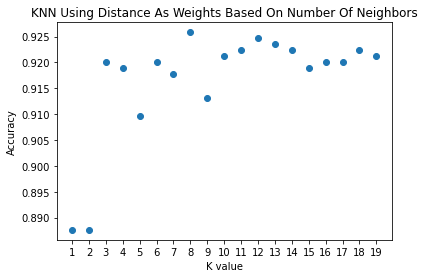

In [22]:
plt.plot(try_k, k_rs['Accuracy'], 'o')
plt.title('KNN Using Distance As Weights Based On Number Of Neighbors')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(try_k)
plt.show()

- Finally, contruct confusion matrix for KNN model with found optimal number of neighbors

Accuracy =  0.9258400926998841 
Precision = [0.92619926 0.92523364] 
Recall =  [0.95437262 0.88130564] 
F1 Score =  [0.94007491 0.90273556]
Raw Confusion Matrix: 
 [[502  24]
 [ 40 297]]


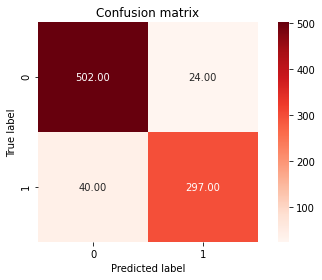

In [23]:
# Use optimal k for validate dataset
knnClf = KNeighborsClassifier(n_neighbors = k_optimal_acc_k, weights='distance')  
knnClf.fit(x_train_scaled,y_train)
y_val_pred = knnClf.predict(x_val_scaled)

viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

- **Precision** is quite high for both classes: 92.5% in class 1 shows that only 7.5% of classified-as-spam emails is not spam. 
- **Recall** of class 0 seems like a good value: 95.4% of real non-spam emails have been correctly classified as non-spam emails using KNN model.
- **Accuracy** is nearly 92.58%, which is approximately same as the accuracy of Decision Tree Model.

### Classification: Naive Bayes

#### Guassian Naive Bayes

In [24]:
# train with Naive Bayes
nbClf = GaussianNB()  
nbClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

Accuracy =  0.8111239860950173 
Precision = [0.96183206 0.68510638] 
Recall =  [0.71863118 0.95548961] 
F1 Score =  [0.8226333  0.79801735]
Raw Confusion Matrix: 
 [[378 148]
 [ 15 322]]


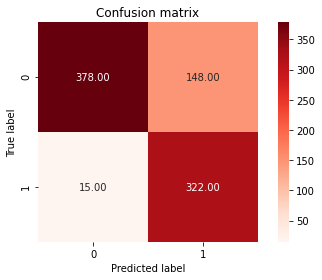

In [25]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Multinomial Naive Bayes

In [26]:
# train with Multinomial Naive Bayes
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled1 = pd.DataFrame(scaler.transform(x_train))
x_val_scaled1 = pd.DataFrame(scaler.transform(x_val))
nbClf = MultinomialNB()  
nbClf.fit(x_train_scaled1,y_train)
print(x_train_scaled1.head())
# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled1)

         0         1         2    3      4         5         6         7   \
0  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.0  0.000  0.000000  0.000000  0.000000   
2  0.000000  0.051821  0.000000  0.0  0.000  0.253401  0.101788  0.000000   
3  0.103524  0.021709  0.127027  0.0  0.005  0.025510  0.006878  0.020702   
4  0.000000  0.000000  0.362162  0.0  0.067  0.000000  0.000000  0.000000   

        8         9   ...     47   48        49   50        51        52  \
0  0.00000  0.000000  ...  0.000  0.0  0.000000  0.0  0.000000  0.000000   
1  0.00000  0.000000  ...  0.091  0.0  0.017945  0.0  0.000000  0.000000   
2  0.00000  0.000000  ...  0.000  0.0  0.031481  0.0  0.000000  0.000000   
3  0.08365  0.041804  ...  0.000  0.0  0.006973  0.0  0.010592  0.147925   
4  0.00000  0.000000  ...  0.000  0.0  0.000000  0.0  0.010222  0.020755   

         53        54        55        56  
0  0.000000  0.000202  0.000100  0.0

Accuracy =  0.895712630359212 
Precision = [0.87586207 0.93639576] 
Recall =  [0.96577947 0.78635015] 
F1 Score =  [0.91862568 0.85483871]
Raw Confusion Matrix: 
 [[508  18]
 [ 72 265]]


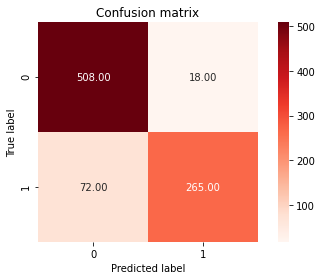

In [27]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Bernoulli Naive Bayes

In [28]:
# train with Bernoulli Naive Bayes
nbClf = BernoulliNB()
x_train_scaled2 = x_train.apply(lambda x: [0 if z <= 0 else 1 for z in x])
x_val_scaled2 = x_val.apply(lambda x: [0 if z <= 0 else 1 for z in x])

print(x_train_scaled2.head())
nbClf.fit(x_train_scaled2,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled2)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
3978               0                  0              0             0   
3882               0                  0              0             0   
1508               0                  1              0             0   
1208               1                  1              1             0   
369                0                  0              1             0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
3978              0               0                 0                   0   
3882              0               0                 0                   0   
1508              0               1                 1                   0   
1208              1               1                 1                   1   
369               1               0                 0                   0   

      word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
3978                0  

Accuracy =  0.880648899188876 
Precision = [0.8783542  0.88486842] 
Recall =  [0.93346008 0.79821958] 
F1 Score =  [0.90506912 0.83931357]
Raw Confusion Matrix: 
 [[491  35]
 [ 68 269]]


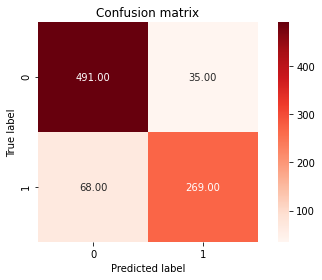

In [29]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### Assessment of Naive Bayes Classification
- Gaussian: Accuracy ~ 81.1%
    - is suitable for data with standard (Gaussian) distribution. If original data is not Gaussian, it must be tranformed to Gaussain. Therefore, the ratio of value, more or less, will be changed and caused difference with the original data. Also, Gaussian is more suitable for continuous variable (which is not the case of the problem since frequency is countable) 
- Multinomial: Accuracy ~ 89.6%
    - Using scale min max to transform so the ratio is preserved (just shrink to range 0-1). Hence, data property is still unchanged
- Bernoulli: Accuracy ~ 88.1%
    - Consider only if the word is present or not without its frequency so data remained unchanged and so does its property

- Overall
    + Naive Bayes classification is a simple probability algorithm based on the fact, that all features of the model are independent. In the context of the spam filter, we suppose, that every word in the message is independent of all other words and we count them with the ignorance of the context. The probability of a word to belong to the spam message is a frequency of this word in the “spam part” of our dataset. Our dataset of spam from spambase consists of independent words considered to be spam regardless of context they appeared together
    + => Using Naïve Bayes Classification is appropriate


### Classification: SVM

In [30]:
svmModel = SVC()
svmModel.fit(x_train_scaled, y_train)

y_val_pred = svmModel.predict(x_val_scaled)

Accuracy =  0.9397450753186558 
Precision = [0.93566176 0.94670846] 
Recall =  [0.96768061 0.89614243] 
F1 Score =  [0.95140187 0.92073171]
Raw Confusion Matrix: 
 [[509  17]
 [ 35 302]]


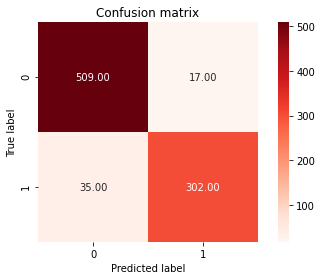

In [31]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [32]:
# Gaussian kernel 
svmClf = SVC(kernel = 'rbf')  
svmClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = svmClf.predict(x_val_scaled)

Accuracy =  0.9397450753186558 
Precision = [0.93566176 0.94670846] 
Recall =  [0.96768061 0.89614243] 
F1 Score =  [0.95140187 0.92073171]
Raw Confusion Matrix: 
 [[509  17]
 [ 35 302]]


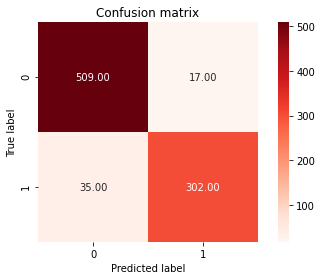

In [33]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [34]:
# linear
# K(x, xi) = x * xi (tich vo huong 2 vector)
# Product between two vectors is the sum of the multiplication of each pair of input values
svmLinear = SVC(kernel = 'linear')
svmLinear.fit(x_train_scaled, y_train)

y_val_pred = svmLinear.predict(x_val_scaled)

Accuracy =  0.9432213209733488 
Precision = [0.94915254 0.93373494] 
Recall =  [0.9581749  0.91988131] 
F1 Score =  [0.95364238 0.92675635]
Raw Confusion Matrix: 
 [[504  22]
 [ 27 310]]


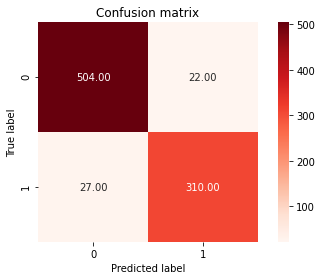

In [35]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

In [36]:
# poly
# K(x, xi) = (1 + x * xi)^d
# More generalized form of linear. This kernel can distinguish curved or nonlinear input space.
# d is the degree of the polynomial. Default 3
svmPoly = SVC(kernel = 'poly')
svmPoly.fit(x_train_scaled, y_train)

y_val_pred = svmPoly.predict(x_val_scaled)

Accuracy =  0.7520278099652375 
Precision = [0.71369863 0.96240602] 
Recall =  [0.9904943  0.37982196] 
F1 Score =  [0.82961783 0.54468085]
Raw Confusion Matrix: 
 [[521   5]
 [209 128]]


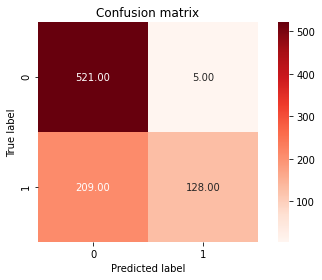

In [37]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

The accuracy seems to decrease when the degree of polynomial is increasing

In [38]:
# kernel sigmoid using sklearn
svmSigmoid = SVC(kernel = 'sigmoid')
svmSigmoid.fit(x_train_scaled, y_train)

y_val_pred = svmSigmoid.predict(x_val_scaled)

Accuracy =  0.895712630359212 
Precision = [0.89492754 0.89710611] 
Recall =  [0.9391635  0.82789318] 
F1 Score =  [0.91651206 0.86111111]
Raw Confusion Matrix: 
 [[494  32]
 [ 58 279]]


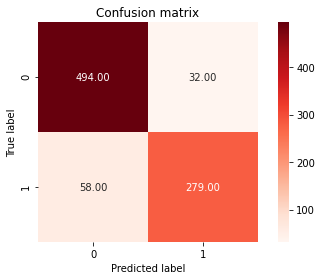

In [39]:
viewConfMatrixAndPerfMeasures(y_val,y_val_pred)

#### SVM
##### Bai toan doi ngau Lagrange  
In order to solve the classification problem, the following functions are considered:  
\begin{equation}
    \lambda = \argmax g(\lambda) \text{  subject to: } \lambda \geq 0 \text{ ,   } \sum^N_{n = 1}{\lambda_ny_n} = 0
\end{equation}
To solve the above equation, we need to compute two variables $w$ and $b$:
\begin{equation}
    w = \sum_{m \in S}{\lambda_my_mx_m}
\end{equation}
\begin{equation}
    b = \frac{1}{N_S}\sum_{n \in S}{y_n - w^Tx_n} = \frac{1}{N_S}\sum_{n \in S}{y_n} - \sum_{m \in S}{\lambda_my_mx^T_mx_n}
\end{equation}

In [40]:
# check xem co bao nhieu record la spam va not spam
# filter_spam = []
# filter_notspam = []

# def filter(arr, isSpam):
#     filtered_arr = []
#     for element in arr:
#         if element == isSpam:
#             filtered_arr.append(True)
#         else :
#             filtered_arr.append(False)
#     return filtered_arr

# filter_spam = filter(y_train, 1)
# filter_notspam = filter(y_train, 0)

# x_train_spam = x_train_scaled[filter_spam]
# x_train_notspam = x_train_scaled[filter_notspam]

In [41]:
# Change class from 0 to -1
y_train_raw = y_train.map({0 : -1, 1 : 1})
y_test_raw = y_test.map({0 : -1, 1 : 1})
print(y_train_raw)

3978   -1
3882   -1
1508    1
1208    1
369     1
       ..
657     1
4522   -1
2235   -1
2086   -1
2206   -1
Name: class, Length: 2587, dtype: int64


In [42]:
regularization_strength = 10000
learning_rate = 0.000001

def compute_cost(W, X, Y): 
    ## calculate hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = regularization_strength * (np.sum(distances) / N)

    # calculate cost
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

In [43]:
def calculate_cost_gradient(W, X_batch, Y_batch):
    # if only one example is passed (eg. in case of SGD)
#     print("type")
#     print(type(Y_batch))
    if type(Y_batch) == np.int64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  # gives multidimensional array
    distance = 1 - (Y_batch * np.dot(X_batch, W))
#     print(distance)
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization_strength * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)  # average
    return dw

In [44]:
from sklearn.utils import shuffle
def sgd(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    # stochastic gradient descent
    for epoch in range(1, max_epochs):
        # shuffle to prevent repeating update cycles
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = calculate_cost_gradient(weights, x, Y[ind])
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = compute_cost(weights, features, outputs)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

In [45]:
W = sgd(x_train_scaled.to_numpy(), y_train_raw.to_numpy())
print("training finished.")
print("weights are: {}".format(W))

Epoch is: 1 and Cost is: 2364.3139614991446
Epoch is: 2 and Cost is: 2352.897013321962
training finished.
weights are: [ 0.03170194 -0.03786863 -0.03214884  0.23977324  0.30394754 -0.00968047
  0.83467663  0.16348096  0.08793021  0.03327872  0.04250679 -0.02810491
  0.00140369 -0.07390272  0.26366563  0.59691231  0.29855062  0.18359198
  0.16082997  0.41150265  0.21201258  0.25855774  0.77590561  0.66187526
 -0.74559958 -0.1951079  -0.32778483  0.10650466 -0.10895506 -0.15310955
 -0.14872501 -0.00624799 -0.17986766 -0.07928241  0.01516744  0.2352868
 -0.10219078  0.01324565 -0.13372451 -0.13874025 -0.13500908 -0.39779651
  0.00703828 -0.20693605 -0.43038166 -0.3683965  -0.2264036  -0.23295812
 -0.29605253 -0.14980098 -0.11913374  0.49675221  0.90855759  0.15057513
  0.1985681   0.51282734  0.14110287]


In [46]:
y_train_predicted = np.array([])
for i in range(x_train_scaled.shape[0]):
    yp = np.sign(np.dot(x_train_scaled.to_numpy()[i], W))
    y_train_predicted = np.append(y_train_predicted, yp)

In [47]:
y_test_predicted = np.array([])
for i in range(x_test_scaled.shape[0]):
    yp = np.sign(np.dot(x_test_scaled.to_numpy()[i], W))
    y_test_predicted = np.append(y_test_predicted, yp)

Accuracy =  0.9035621198957429 
Precision = [0.9084507  0.89569161] 
Recall =  [0.93342981 0.85869565] 
F1 Score =  [0.92077088 0.87680355]
Raw Confusion Matrix: 
 [[645  46]
 [ 65 395]]


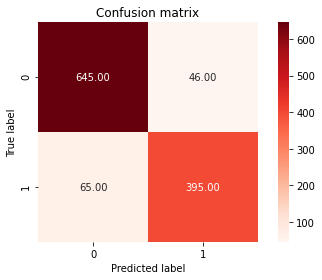

In [48]:
y_test_predicted = [int(a) for a in y_test_predicted]
y_test_predicted = pd.Series(y_test_predicted)

viewConfMatrixAndPerfMeasures(y_test_raw,y_test_predicted)

## Model Evaluation
### Evaluate with test dataset

In [49]:
# Evaluate Helpers
def genPerfMetricsHlp(model_name, y_true, y_pred):
    accuracy, precision, recall, f1_score = getPerfMeasures(y_true, y_pred)
    perfCR = getPerfClassificationReport(y_true, y_pred)
    perf_metrics = (model_name, accuracy, precision, recall, f1_score, 
                    perfCR['macro avg']['precision'], perfCR['macro avg']['recall'])
    return perf_metrics

#### Decision Tree

- predict using model with criterion as entropy

In [50]:
entropyDecisionTreeClf = dtTrainHlp(x_train_scaled, y_train, "entropy", entropy_optimal_acc_depth)
entropy_dt_y_test_pred = entropyDecisionTreeClf.predict(x_test_scaled)

- predict using model with criterion as gini

In [51]:
giniDecisionTreeClf = dtTrainHlp(x_train_scaled, y_train, "gini", gini_optimal_acc_depth)
gini_dt_y_test_pred = giniDecisionTreeClf.predict(x_test_scaled)

#### KNN

In [52]:
# fit the KNN model with optimal number of neighbors
knnClf = KNeighborsClassifier(n_neighbors = k_optimal_acc_k, weights='distance')  
knnClf.fit(x_train_scaled, y_train)
k_y_test_pred = knnClf.predict(x_test_scaled)

#### Naive Bayes

- predict using Gaussian

In [53]:
nbClf = GaussianNB()  
nbClf.fit(x_train_scaled, y_train)
gaussian_nb_y_test_pred = nbClf.predict(x_test_scaled)

- predict using Multinomial

In [54]:
x_test_scaled1 = pd.DataFrame(scaler.transform(x_test))
nbClf = MultinomialNB()  
nbClf.fit(x_train_scaled1,y_train)
multinomial_nb_y_test_pred = nbClf.predict(x_test_scaled1)

- predict using Bernoulli

In [55]:
x_test_scaled2 = x_test.apply(lambda x: [0 if z <= 0 else 1 for z in x])
nbClf = BernoulliNB()
nbClf.fit(x_train_scaled2,y_train)

# estimate the skill of model with validation dataset
bernoulli_nb_y_test_pred = nbClf.predict(x_test_scaled2)

#### SVM

- predict using Rbf

In [56]:
rbf_svm_y_test_pred = svmClf.predict(x_test_scaled)

- predict using Linear

In [57]:
linear_svm_y_test_pred = svmLinear.predict(x_test_scaled)

- predict using Poly

In [58]:
poly_svm_y_test_pred = svmPoly.predict(x_test_scaled)

- predict using Sigmoid

In [59]:
sigmoid_svm_y_test_pred = svmSigmoid.predict(x_test_scaled)

In [60]:
# gen metrics for each model
entropy_dt_metrics = genPerfMetricsHlp('DT Entropy', y_test, entropy_dt_y_test_pred)
gini_dt_metrics = genPerfMetricsHlp('DT gini', y_test, gini_dt_y_test_pred)
k_metrics = genPerfMetricsHlp('KNN', y_test, k_y_test_pred)
gaussian_nb_metrics = genPerfMetricsHlp('NB Gaussian', y_test, gaussian_nb_y_test_pred)
multinomial_nb_metrics = genPerfMetricsHlp('NB multinomial', y_test, multinomial_nb_y_test_pred)
bernoulli_nb_metrics = genPerfMetricsHlp('NB bernoulli', y_test, bernoulli_nb_y_test_pred)
rbf_svm_metrics = genPerfMetricsHlp('SVM Rbf', y_test, rbf_svm_y_test_pred)
linear_svm_metrics = genPerfMetricsHlp('SVM Linear', y_test, linear_svm_y_test_pred)
poly_svm_metrics = genPerfMetricsHlp('SVM Poly', y_test, poly_svm_y_test_pred)
sigmoid_svm_metrics = genPerfMetricsHlp('SVM Sigmoid', y_test, sigmoid_svm_y_test_pred)

# integrate metrics into a single table
perfMetricTable = pd.DataFrame([entropy_dt_metrics, gini_dt_metrics, k_metrics, gaussian_nb_metrics, multinomial_nb_metrics, bernoulli_nb_metrics, rbf_svm_metrics, linear_svm_metrics, poly_svm_metrics, sigmoid_svm_metrics], 
                               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Overall Precision', 'Overall Recall'])

# looking for the model having the best accuracy
best_acc_idx = perfMetricTable['Accuracy'].idxmax()
print(f"Model {perfMetricTable['Model'][best_acc_idx]} has the best accuracy: {round(perfMetricTable['Accuracy'][best_acc_idx], 5)}\n")

# looking for the model having the best precision of class 1
best_precision_1_idx = pd.Series([ele[1] for ele in perfMetricTable['Precision']]).idxmax()
print(f"Model {perfMetricTable['Model'][best_precision_1_idx]} (accuracy: {round(perfMetricTable['Accuracy'][best_precision_1_idx], 5)}) has the best precision for class 1: {round(perfMetricTable['Precision'][best_precision_1_idx][1], 5)}\n")

# looking for the model having the best recall of class 0
best_recall_0_idx = pd.Series([ele[0] for ele in perfMetricTable['Recall']]).idxmax()
print(f"Model {perfMetricTable['Model'][best_recall_0_idx]} (accuracy: {round(perfMetricTable['Accuracy'][best_recall_0_idx], 5)}) has the best recall for class 0: {round(perfMetricTable['Recall'][best_recall_0_idx][0], 5)}\n")

# looking for the model having the best precision overall
best_prec_over_idx = perfMetricTable['Overall Precision'].idxmax()
print(f"Model {perfMetricTable['Model'][best_prec_over_idx]} (accuracy: {round(perfMetricTable['Accuracy'][best_prec_over_idx], 5)}) has the best overall precision: {round(perfMetricTable['Overall Precision'][best_prec_over_idx], 5)}\n")

# looking for the model having the best recall overall
best_rec_over_idx = perfMetricTable['Overall Recall'].idxmax()
print(f"Model {perfMetricTable['Model'][best_rec_over_idx]} (accuracy: {round(perfMetricTable['Accuracy'][best_rec_over_idx], 5)}) has the best overall recall: {round(perfMetricTable['Overall Recall'][best_rec_over_idx], 5)}\n")

perfMetricTable.style.hide_index()

Model KNN has the best accuracy: 0.92268

Model SVM Poly (accuracy: 0.755) has the best precision for class 1: 0.93204

Model SVM Poly (accuracy: 0.755) has the best recall for class 0: 0.97974

Model KNN (accuracy: 0.92268) has the best overall precision: 0.92265

Model KNN (accuracy: 0.92268) has the best overall recall: 0.91562



Model,Accuracy,Precision,Recall,F1 Score,Overall Precision,Overall Recall
DT Entropy,0.906169,[0.90096286 0.91509434],[0.94790159 0.84347826],[0.92383639 0.87782805],0.908029,0.895690
DT gini,0.906169,[0.90206897 0.91314554],[0.94645441 0.84565217],[0.92372881 0.87810384],0.907607,0.896053
KNN,0.922676,[0.92275281 0.92255125],[0.95079595 0.88043478],[0.9365645 0.90100111],0.922652,0.915615
NB Gaussian,0.799305,[0.93071161 0.68557536],[0.71924747 0.91956522],[0.81142857 0.78551532],0.808143,0.819406
NB multinomial,0.886186,[0.87037037 0.9164557 ],[0.95224313 0.78695652],[0.90946786 0.84678363],0.893413,0.869600
NB bernoulli,0.873154,[0.86874154 0.88106796],[0.92908828 0.78913043],[0.8979021 0.83256881],0.874905,0.859109
SVM Rbf,0.918332,[0.91059147 0.93160377],[0.95803184 0.85869565],[0.93370945 0.89366516],0.921098,0.908364
SVM Linear,0.909644,[0.90934449 0.91013825],[0.94356006 0.85869565],[0.92613636 0.8836689 ],0.909741,0.901128
SVM Poly,0.754996,[0.71640212 0.93203883],[0.97973951 0.4173913 ],[0.82762836 0.57657658],0.824220,0.698565
SVM Sigmoid,0.882711,[0.88186813 0.88416076],[0.92908828 0.81304348],[0.90486258 0.84711212],0.883014,0.871066


## Learning Curves

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

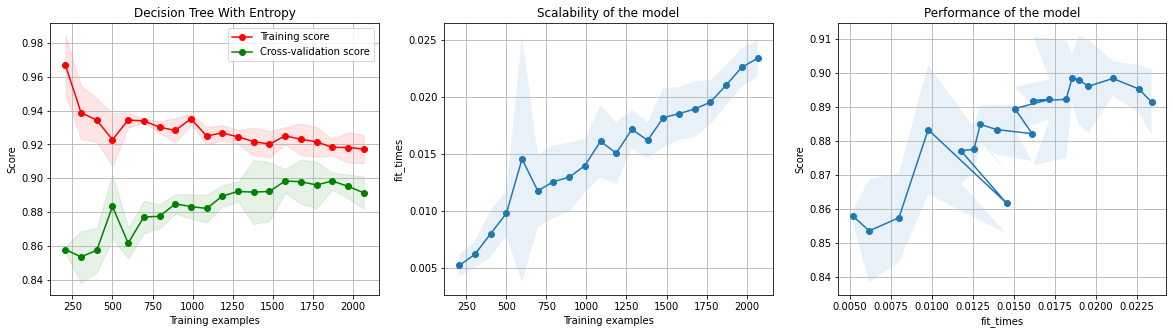

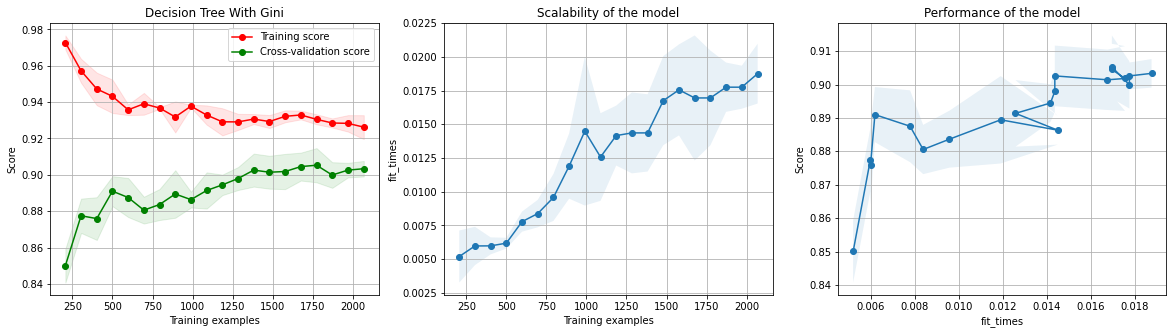

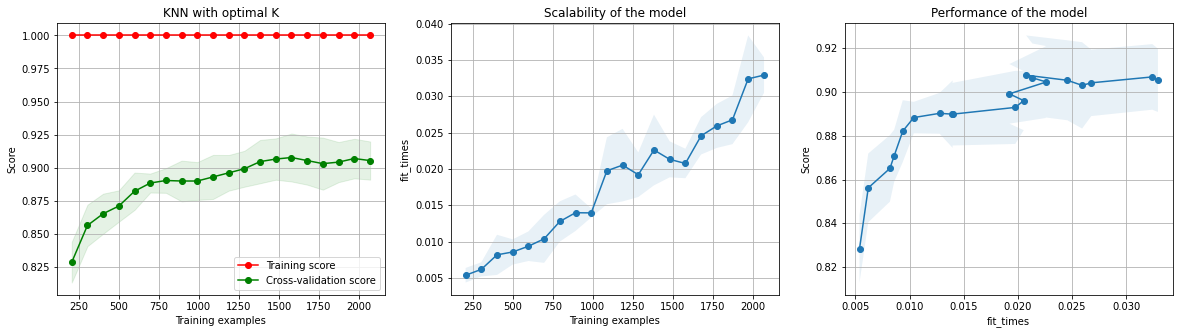

In [62]:
# entropyDecisionTreeClf= DecisionTreeClassifier(criterion="entropy", max_depth=entropy_optimal_acc_depth, random_state=1)
# giniDecisionTreeClf= DecisionTreeClassifier(criterion="gini", max_depth=gini_optimal_acc_depth, random_state=1)
entropyDecisionTreeClf= DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=1)
giniDecisionTreeClf= DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=1)
newKnnCLf = KNeighborsClassifier(n_neighbors = k_optimal_acc_k, weights='distance')
plot_learning_curve(estimator=entropyDecisionTreeClf, title="Decision Tree With Entropy", X=x_train_scaled, y=y_train, axes=None, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 20))
plot_learning_curve(estimator=giniDecisionTreeClf, title="Decision Tree With Gini", X=x_train_scaled, y=y_train, axes=None, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 20))
plot_learning_curve(estimator=newKnnCLf, title="KNN with optimal K", X=x_train_scaled, y=y_train, axes=None, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 20))

- Thing goes strangely when we try to plot the learning curve for Decision Tree & KNN model. If we use those models with optimal parameter that we had found, the learning curve goes overfitting (approximately 1 for all). This can be because the dataset is too small.
- If we choose small depth for decision tree, the learning curves look better but still have decline.

In [63]:
# plot_learning_curve(estimator=entropyDecisionTreeClf, title="Decision Tree With Entropy", X=x_val_scaled, y=y_val, axes=None, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 20))
# plot_learning_curve(estimator=giniDecisionTreeClf, title="Decision Tree With Gini", X=x_val_scaled, y=y_val, axes=None, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 20))
# plot_learning_curve(estimator=newKnnCLf, title="KNN with optimal K", X=x_val_scaled, y=y_val, axes=None, ylim=None, cv=None, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 20))